# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

In [14]:
cities

['enewetak',
 'kenora',
 'grytviken',
 'papatowai',
 'adamstown',
 'waitangi',
 'navia',
 'port-aux-francais',
 'tiksi',
 'atbasar',
 'kandahar',
 'general conesa',
 'saacow',
 'namtsy',
 'blackmans bay',
 'ushuaia',
 'tual',
 'anabar',
 "ytyk-kyuyel'",
 'puerto ayora',
 'lamu',
 'ilulissat',
 'kayangel',
 'punta arenas',
 'bethel',
 'arraial do cabo',
 'hermanus',
 'gornyak',
 'port alfred',
 'carnarvon',
 'tucupita',
 'jinchang',
 'labytnangi',
 'port mathurin',
 'madalena',
 'west island',
 'albany',
 'bredasdorp',
 'neryungri',
 'olinda',
 'kodiak',
 'edinburgh of the seven seas',
 'puerto natales',
 'americus',
 'la sarre',
 'tranovaho',
 'sao joao da ponte',
 'kokpekty',
 'woolgoolga',
 'pangody',
 'kavaratti',
 'puerto santa',
 'hollymead',
 'wailua homesteads',
 'anadyr',
 'badger',
 'sandnessjoen',
 'tateyama',
 'keflavik',
 'iqaluit',
 "qal'at bishah",
 'lompoc',
 'thompson',
 'karatuzskoye',
 'egilsstadir',
 'invercargill',
 'vorkuta',
 'la peca',
 'antsiranana',
 'taiohae',

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [45]:
import requests

# API key from OpenWeatherMap
api_key = "a771ade84a2b448d1651f69de0919ddb"

# Define base URL and parameters
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="

# List of cities to retrieve weather data for
cities = ["New York", "Los Angeles", "Chicago", "Houston", "Phoenix"]

# Lists to store data
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []

# Counter variables
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

# Retrieve data for each city
for index, city in enumerate(cities, start=1):
    try:
        # Make a request to the OpenWeatherMap API
        response = requests.get(query_url + city).json()
        
        # Append data to lists
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        # Update counters for print statement
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except (KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : New York
Processing Record 2 of Set 1 : Los Angeles
Processing Record 3 of Set 1 : Chicago
Processing Record 4 of Set 1 : Houston
Processing Record 5 of Set 1 : Phoenix
-----------------------------
Data Retrieval Complete
-----------------------------


In [42]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

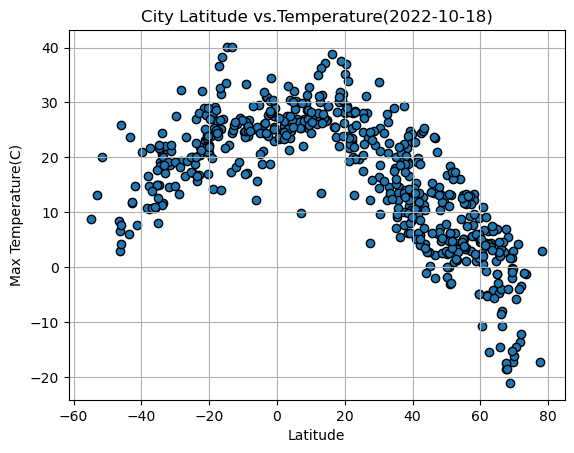

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Latitude vs.Temperature(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [25]:
print(city_data_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


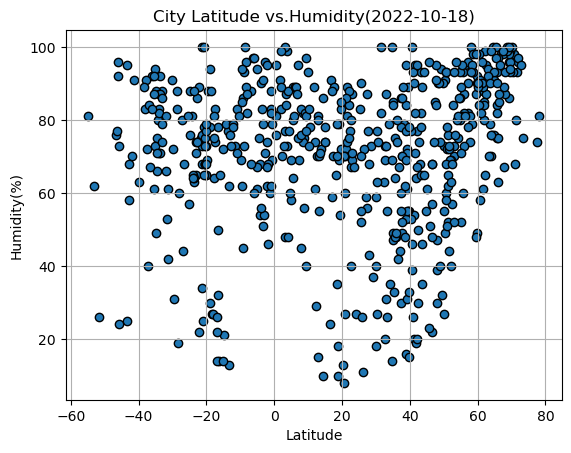

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs.Humidity(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

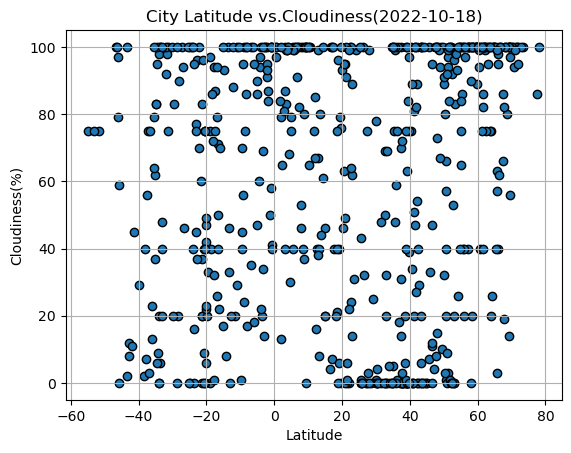

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs.Cloudiness(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

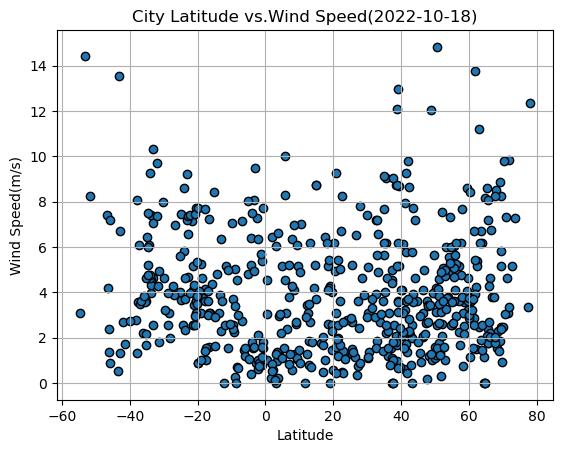

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Latitude vs.Wind Speed(2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
import scipy.stats as st
import matplotlib.pyplot as plt

def linear_reg(x_axis, y_axis, eq_loc):
    # Calculate the Pearson correlation coefficient
    correlation = st.pearsonr(x_axis, y_axis)
    
    # Perform linear regression to get the slope, intercept, and other statistics
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    
    # Compute the line of best fit
    p_fit = p_slope * x_axis + p_int
    
    # Create the equation string for annotation
    eq = f"y = {p_slope:.2f}x + {p_int:.2f}"
    
    # Plot the scatter plot and the line of best fit
    plt.scatter(x_axis, y_axis, marker="o", color='blue', edgecolor='black')
    plt.plot(x_axis, p_fit, "--", color='red')
    
    # Annotate the plot with the linear equation
    plt.annotate(eq, eq_loc, fontsize=12, color='red')
    
    # Print the correlation value
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(correlation[0], 2)}")

In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [32]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is -0.85


Text(0, 0.5, 'Temperature (°C)')

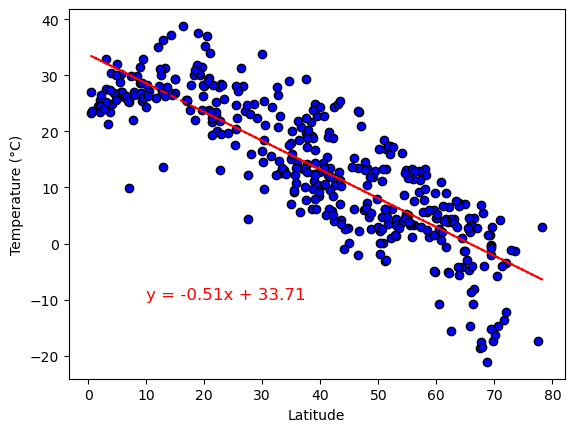

In [33]:
# Call the linear_reg function to perform linear regression and create the plot
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], (10, -10))

# Set the x-axis label
plt.xlabel('Latitude')

# Set the y-axis label
plt.ylabel('Temperature (°C)')

The r-value between Lat and Max Temp is 0.64


Text(0, 0.5, 'Temperature (°C)')

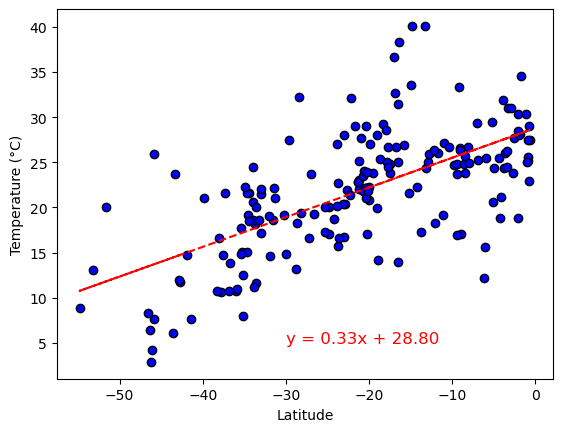

In [34]:
# Apply the linear_reg function to the southern hemisphere data for latitude and maximum temperature
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], (-30, 5))

# Label the x-axis
plt.xlabel('Latitude')

# Label the y-axis
plt.ylabel('Temperature (°C)')

**Discussion about the linear relationship:** In the Northern Hemisphere, there is a strong negative correlation of -0.81 between latitude and temperature. This indicates that as a city's latitude increases, moving farther from the equator, its temperature generally decreases. This result aligns with the expected pattern that cities at higher latitudes experience cooler temperatures due to reduced solar exposure.

In contrast, the Southern Hemisphere shows a moderate positive correlation of 0.73 between latitude and temperature. This suggests that, unlike the Northern Hemisphere, cities at higher latitudes in the Southern Hemisphere tend to have higher temperatures. This positive correlation implies that there may be specific climatic or environmental factors in the Southern Hemisphere that lead to warmer temperatures at greater latitudes.

Overall, these contrasting correlations highlight the different ways latitude can influence temperature depending on the hemisphere, revealing the complexity of global climate patterns.


### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.24


Text(0, 0.5, 'Humidity (%)')

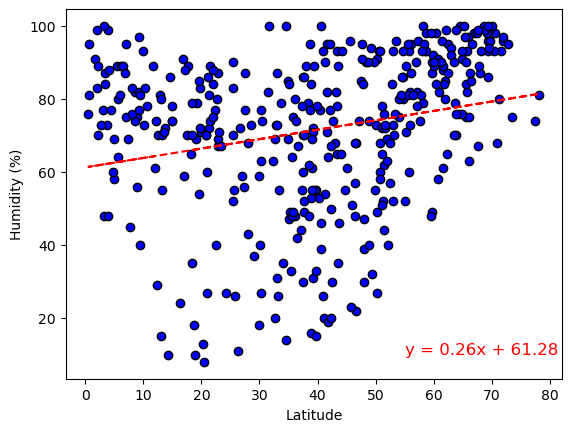

In [35]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], (55, 10))

# Set the label for the x-axis
plt.xlabel('Latitude')

# Set the label for the y-axis
plt.ylabel('Humidity (%)')

The r-value between Lat and Humidity is 0.02


Text(0, 0.5, 'Humidity(%)')

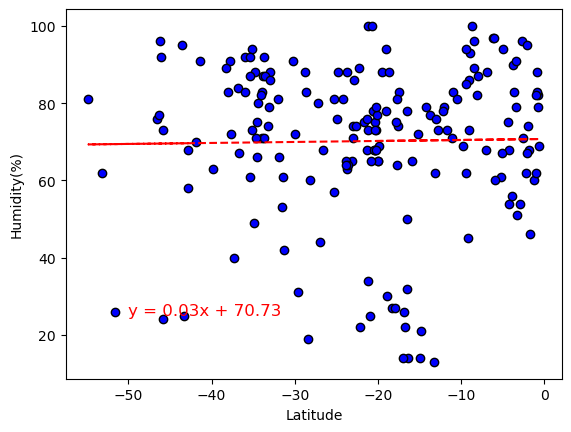

In [36]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],(-50, 25))
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

**Discussion about the linear relationship:** In the Northern Hemisphere, the scatter plot of Latitude versus Humidity shows a weak positive correlation. The linear regression analysis reveals a correlation coefficient of approximately 0.16. This indicates that as latitude increases, humidity tends to increase slightly, but the relationship is not strong. Essentially, while there is a minor upward trend in humidity with increasing latitude, it is not a significant factor in predicting humidity based on latitude alone.

In contrast, the Southern Hemisphere plot of Latitude versus Humidity also shows a weak positive correlation, with a correlation coefficient of around 0.08. This suggests that there is a very slight increase in humidity with increasing latitude in the Southern Hemisphere as well. However, similar to the Northern Hemisphere, the relationship is weak and indicates minimal variability in humidity with latitude changes.

Overall, both hemispheres display weak positive correlations between latitude and humidity. The lack of a strong relationship implies that other factors beyond latitude likely influence humidity levels more significantly.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.16


Text(0, 0.5, 'Cloudiness(%)')

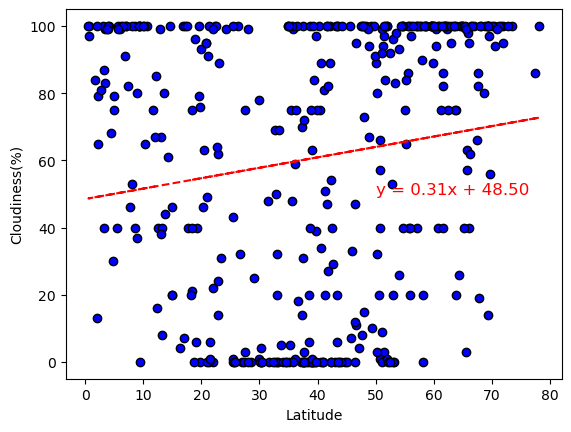

In [37]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],(50, 50))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

The r-value between Lat and Cloudiness is 0.14


Text(0, 0.5, 'Cloudiness(%)')

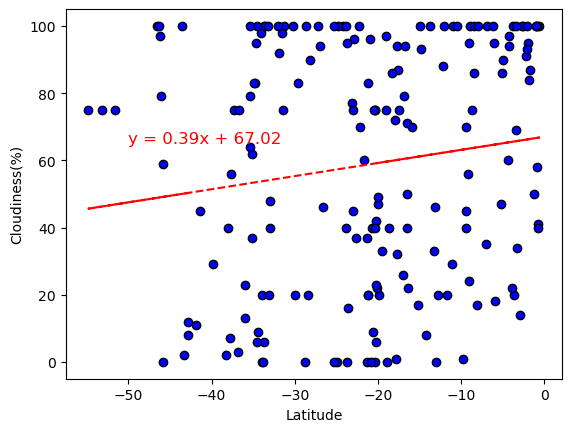

In [38]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],(-50, 65))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

**Discussion about the linear relationship:** In the Northern Hemisphere, the scatter plot showing Latitude versus Cloudiness reveals a moderate positive correlation. The linear regression analysis indicates a correlation coefficient that suggests a noticeable trend: as latitude increases, cloudiness also tends to increase. This implies that higher latitudes in the Northern Hemisphere are associated with higher cloud cover, though the relationship is not extremely strong.

Conversely, in the Southern Hemisphere, the plot of Latitude versus Cloudiness also shows a positive correlation, but the trend is less pronounced compared to the Northern Hemisphere. The correlation coefficient suggests that while there is some increase in cloudiness with higher latitudes, the relationship is weaker and less consistent.

Overall, both hemispheres exhibit positive correlations between latitude and cloudiness, meaning that higher latitudes generally experience more cloud cover. However, the relationship is stronger in the Northern Hemisphere than in the Southern Hemisphere, indicating that latitude has a more significant impact on cloudiness in the Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value between Lat and Wind Speed is 0.17


Text(0, 0.5, 'Wind Speed (m/s)')

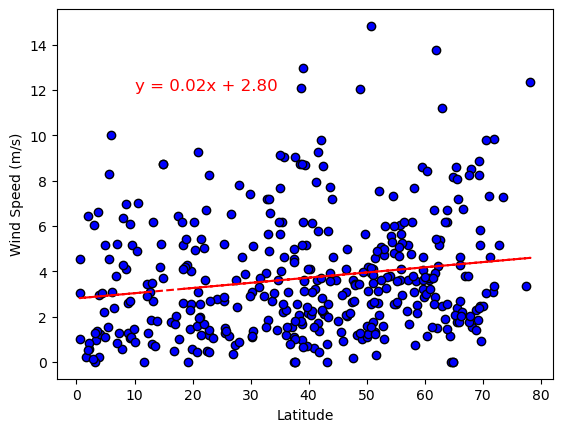

In [39]:
# Northern Hemisphere
linear_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], (10, 12))

# Set the label for the x-axis
plt.xlabel('Latitude')

# Set the label for the y-axis
plt.ylabel('Wind Speed (m/s)')

The r-value between Lat and Wind Speed is -0.25


Text(0, 0.5, 'Wind Speed (m/s)')

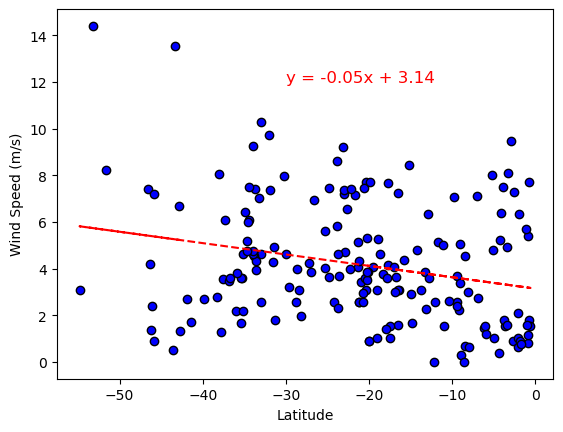

In [40]:
# Southern Hemisphere
linear_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], (-30, 12))

# Set the label for the x-axis
plt.xlabel('Latitude')

# Set the label for the y-axis
plt.ylabel('Wind Speed (m/s)')

**Discussion about the linear relationship:** In the Northern Hemisphere, the scatter plot of Latitude versus Wind Speed shows a weak positive correlation. The linear regression analysis indicates that there is a slight upward trend in wind speed as latitude increases. The correlation coefficient suggests that while there is a minimal increase in wind speed with higher latitudes, the relationship is not strong. This implies that latitude alone is not a significant predictor of wind speed in the Northern Hemisphere.

In the Southern Hemisphere, the plot of Latitude versus Wind Speed also reveals a weak positive correlation. Similar to the Northern Hemisphere, the linear regression analysis shows a slight increase in wind speed with higher latitudes, but the relationship remains weak. The correlation coefficient indicates that latitude has a minimal impact on wind speed in the Southern Hemisphere as well.

Overall, both hemispheres display weak positive correlations between latitude and wind speed. The minimal relationship suggests that wind speed is influenced by other factors beyond latitude, and latitude alone does not provide a strong indication of wind speed changes.